In [76]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [77]:
n = 1000 # number of samples
my_height, height_stddev = 68,3
data = {'height': np.random.normal(my_height, height_stddev, n),
           'hair': np.array(['blonde' if i > .5 else 'brunette' for i in np.random.uniform(0,1.0,n)])}

def get_rating(height, hair):
    u = np.random.normal(2.5,.7)
    if height > my_height:
        return 5+u if hair == 'blonde' else u
    else:
        return 5+u if hair == 'brunette' else u
    
samples = pd.DataFrame(data)
ratings = samples.apply(lambda x: get_rating(x.height, x.hair), axis=1)
hair_num = samples.apply(lambda x: 0 if x.hair == 'blonde' else 1, axis=1)
color = samples.apply(lambda x: 'r' if x.hair == 'blonde' else 'b', axis=1)
samples = samples.assign(rating=ratings)
samples = samples.assign(hair_num=hair_num)
samples = samples.assign(color=color)
samples

,hair,height,rating,hair_num,color
0,brunette,64.455518,7.974664,1,b
1,brunette,65.632254,7.677092,1,b
2,brunette,67.888154,7.950943,1,b
3,blonde,71.818797,8.046985,0,r
4,brunette,66.702996,6.585677,1,b
5,brunette,66.062604,8.345788,1,b
6,brunette,64.361375,6.414993,1,b
7,blonde,67.096733,1.237406,0,r
8,blonde,69.970443,5.783650,0,r
9,blonde,60.681992,1.482728,0,r


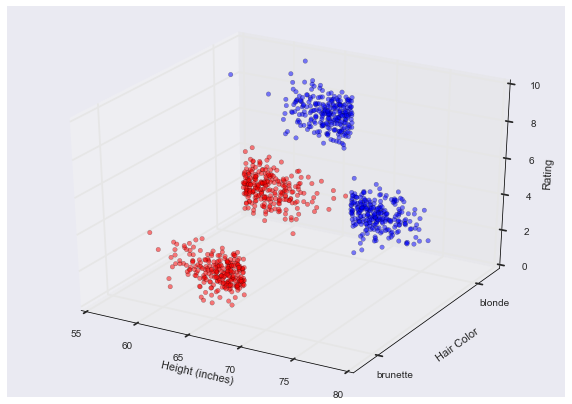

In [78]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
    
def plot_stuff(ax, alpha=.5):
    ax.scatter3D(samples.height, samples.hair_num, samples.rating, c=samples.color, alpha=alpha)
    ax.set_xlabel('Height (inches)')
    ax.set_ylabel('Hair Color')
    ax.set_zlabel('Rating')
    ax.set_ylim([-.2,1.2])
    ax.set_yticks([0,1])
    ax.set_yticklabels(['brunette','blonde'])
    ax.set_zlim([0,10])
plot_stuff(ax)

# Simple Stupid Linear Regression 

In [86]:
regr = linear_model.LinearRegression()
x_test = samples[['height','hair_num']]
y_test = samples['rating']

#samples[['height','hair']]
regr.fit(x_test, y_test)

# The coefficients
print('Coefficients: ' + ', '.join(map(str,regr.coef_)))
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))



Coefficients: -0.0234117926297, 0.0848983036574
Residual sum of squares: 6.92
Variance score: 0.00


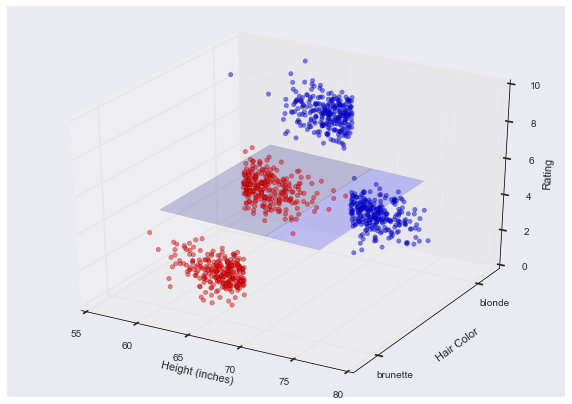

In [87]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

plot_stuff(ax)

xx, yy = np.meshgrid(range(60,76), range(2))
z = regr.coef_[0]*xx + regr.coef_[1]*yy + regr.intercept_
ax.plot_surface(xx, yy, z,  alpha=0.2);

# Decision Trees

Residual sum of squares: 6.87
Variance score: 0.01


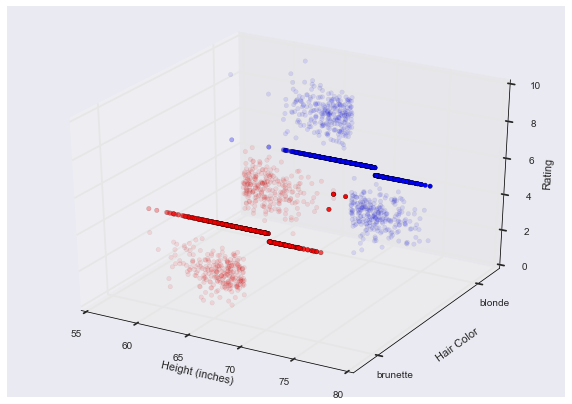

In [101]:
from sklearn import tree

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
plot_stuff(ax, .1)

x_test_brunettes = x_test[x_test['hair_num'] == 1]
x_test_blondes = x_test[x_test['hair_num'] == 0]


regr = tree.DecisionTreeRegressor()
regr.max_depth=2
#regr.min_samples_leaf=10

regr.fit(x_test, y_test)

# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))


ax.scatter3D(x_test_brunettes.height, x_test_brunettes.hair_num, regr.predict(x_test_brunettes), c='b');
ax.scatter3D(x_test_blondes.height, x_test_blondes.hair_num, regr.predict(x_test_blondes), c='r');


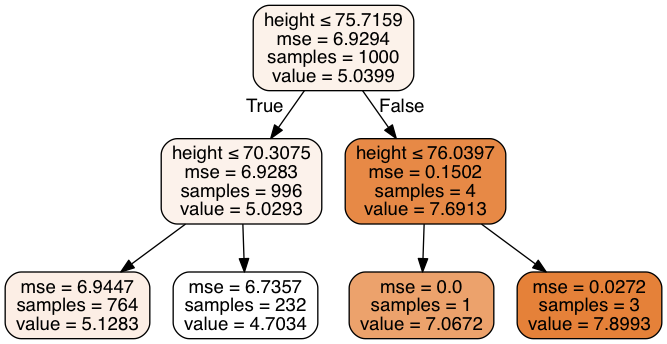

In [102]:

from IPython.display import Image 
from sklearn.externals.six import StringIO  
import pydot

dot_data = StringIO()  
tree.export_graphviz(regr, out_file=dot_data,
                     feature_names=['height','hair'],
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

Residual sum of squares: 0.48
Variance score: 0.93


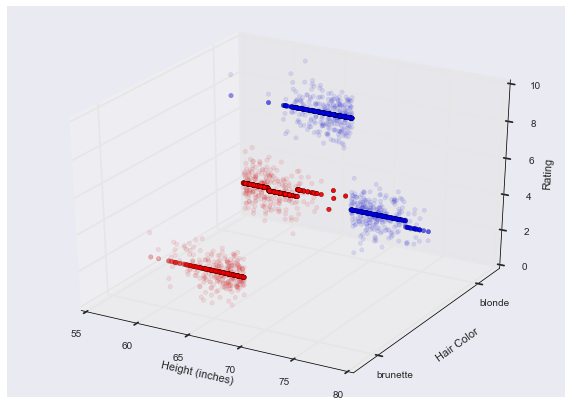

In [103]:
regr = tree.DecisionTreeRegressor()
regr.max_depth=4
#regr.min_samples_leaf=10

regr.fit(x_test, y_test)

# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
plot_stuff(ax, .1)

ax.scatter3D(x_test_brunettes.height, x_test_brunettes.hair_num, regr.predict(x_test_brunettes), c='b');
ax.scatter3D(x_test_blondes.height, x_test_blondes.hair_num, regr.predict(x_test_blondes), c='r');


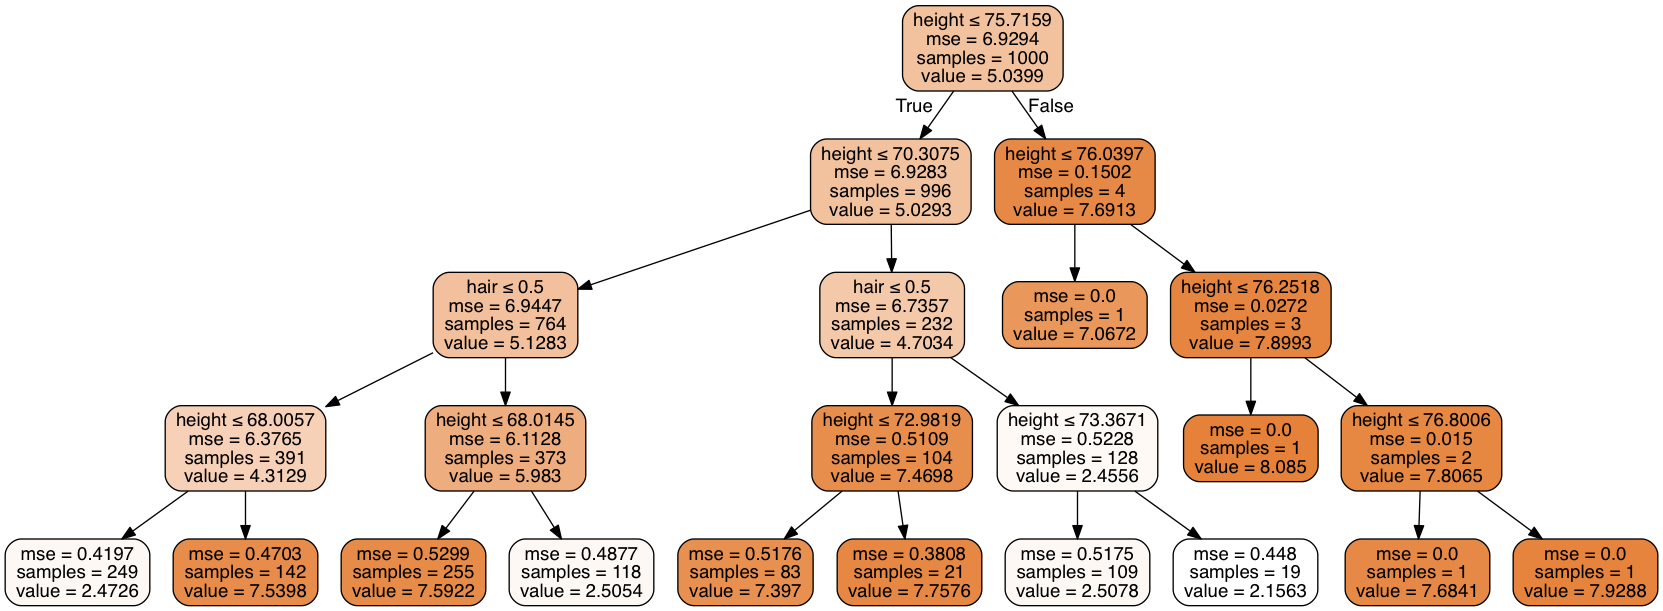

In [104]:
dot_data = StringIO()  
tree.export_graphviz(regr, out_file=dot_data,
                     feature_names=['height','hair'],
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  